In [1]:

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


tensorflow with python 2.7 =>1.12.0
keras 2.2.4
opencv 3.3.1-dev

In [2]:
!ls "/content/drive/My Drive/PandoraCar"

image_training	      model_training.ipynb  test.ipynb
image_training.ipynb  pubmsg.py		    training_data
imgdata.7z	      sizeChecker.py	    Trainning.ipynb


In [0]:
import os
os.chdir("drive/My Drive/PandoraCar")

In [4]:
!ls


image_training	      model_training.ipynb  test.ipynb
image_training.ipynb  pubmsg.py		    training_data
imgdata.7z	      sizeChecker.py	    Trainning.ipynb


In [0]:
!sudo apt-get install p7zip-full p7zip-rar


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following NEW packages will be installed:
  p7zip-rar
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 43.1 kB of archives.
After this operation, 113 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 p7zip-rar amd64 16.02-2 [43.1 kB]
Fetched 43.1 kB in 0s (936 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package p7zip

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
     name=fn, length=len(uploaded[fn])))

Saving imgdata.7z to imgdata.7z
User uploaded file "imgdata.7z" with length 319131026 bytes


In [0]:
!ls
!7z e imgdata.7z

image_training	      model_training.ipynb  test.ipynb
image_training.ipynb  pubmsg.py		    training_data
imgdata.7z	      sizeChecker.py	    Trainning.ipynb

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 319131026 bytes (305 MiB)

Extracting archive: imgdata.7z
--
Path = imgdata.7z
Type = 7z
Physical Size = 319131026
Headers Size = 514
Method = LZMA:24
Solid = +
Blocks = 2

  0%      0% - dt1.npz                1% - dt1.npz                2% - dt1.npz                3% - dt1.npz                4% - dt1.npz                5% - dt1.npz                6% - dt1.npz              

In [5]:
!ls

image_training	      model_training.ipynb  test.ipynb
image_training.ipynb  pubmsg.py		    training_data
imgdata.7z	      sizeChecker.py	    Trainning.ipynb


In [0]:
from sklearn.model_selection import train_test_split
import glob
import sys
import time
import os
import numpy as np
import cv2

In [0]:
input_size = 120*320
data_path = "training_data/*.npz"

In [8]:
def load_data(input_size, path):
    print("Loading training data...")
    start = time.time()

    # load training data
    X = np.empty((0, input_size))
    y = np.empty((0, 4))
    training_data = glob.glob(path)

    # if no data, exit
    if not training_data:
        print("Data not found, exit")
        sys.exit()

    for single_npz in training_data:
        with np.load(single_npz) as data:
            train = data['train']
            train_labels = data['train_labels']
        X = np.vstack((X, train))
        
        y = np.vstack((y, train_labels))
    
    
    #
   
    print("Image array shape: ", X.shape)
    print("Label array shape: ", y.shape)

    end = time.time()
    print("Loading data duration: %.2fs" % (end - start))

    # normalize data
    X = X / 255.

    # train validation split, 7:3
    return train_test_split(X, y, test_size=0.2)
  
X_train, X_valid, y_train, y_valid = load_data(input_size, data_path)

Loading training data...
Image array shape:  (13417, 38400)
Label array shape:  (13417, 4)
Loading data duration: 96.71s


In [9]:
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


forward


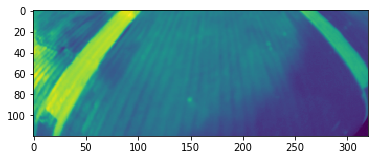

In [17]:

import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(X_train))
plt.imshow(X_train[idx].reshape(120,320)) 
class_names=["right","left","forward","backward"]
print(class_names[(y_train[idx]).argmax(-1)])

In [18]:

#class_names=["right","left","forward","backward"]
num_classes = len(class_names)
# Convert class vectors to class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_valid = keras.utils.to_categorical(y_valid, num_classes)
print(y_train.shape)
print(y_valid.shape)

(10733, 4)
(2684, 4)


In [19]:
img_rows, img_cols = 120, 320

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_valid = X_valid.reshape(X_valid.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'test samples')

x_train shape: (10733, 120, 320, 1)
10733 train samples
2684 test samples


done: (10733, 120, 320, 1)


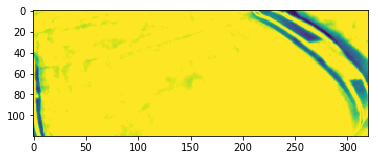

In [23]:
#binarization X_train
def binarization():
  for i in range(10733):
      img=X_train[i]*255

      img=img.astype('uint8')
      
      rgb_planes = cv2.split(img)

      result_planes = []
      result_norm_planes = []
      for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img, None,alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        _, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
        norm_img = cv2.normalize(thr_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
       # result_planes.append(diff_img)
        result_norm_planes.append(norm_img)

     # result = cv2.merge(result_planes)
      result_norm = cv2.merge(result_norm_planes)
      X_train[i]=result_norm.reshape(120,320,1)
      X_train[i]=X_train[i]/255.0
  print("done:",X_train.shape) 
binarization()       
plt.imshow(X_train[789].reshape(120,320))
     
      #img=cv2.medianBlur(img,5)
      #img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
      #              cv2.THRESH_BINARY,7,5)
      
		


#import cv2 
#img=X_train[7354]*255

#img = img.astype('uint8')
#img=cv2.medianBlur(img,5)
#img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#                cv2.THRESH_BINARY,19,13)
#plt.imshow(img.reshape(120,320))
#===============

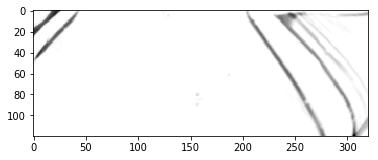

In [30]:
plt.imshow(X_train[212].reshape(120,320),cmap='Greys_r')

//last modified code :

def binarization():

  for i in range(10733):
      img=X_train[i]*255

      img=img.astype('uint8')
      img=cv2.medianBlur(img,5)
          img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                    cv2.THRESH_BINARY,7,5)
      X_train[i]=img.reshape(120,320,1)
      X_train[i]=X_train[i]/255.0
    print("done:",X_train.shape) 
  
binarization()       
plt.imshow(X_train[789].reshape(120,320))
		

done: (2684, 120, 320, 1)


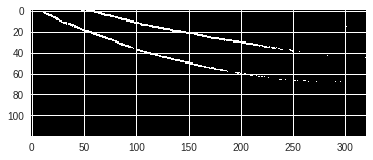

In [0]:
#binarization y_valid

def binarization():
  for i in range(2684):
      img=X_valid[i]*255

      img=img.astype('uint8')
      img=cv2.medianBlur(img,5)
      img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                    cv2.THRESH_BINARY,7,5)
      X_valid[i]=img.reshape(120,320,1)
      X_valid[i]=X_valid[i]/255.0
  print("done:",X_valid.shape) 
binarization()       
plt.imshow(X_valid[789].reshape(120,320))

In [0]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=input_shape, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) 
#model = keras.Sequential()
#model.add(layers.Convolution2D(32, (3, 3),
#                        padding='same',
#                        input_shape=input_shape, activation='relu'))
#model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Dropout(0.25))
#model.add(layers.Flatten())
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(4, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#'accuracy
#top_k_categorical_accuracy
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 320, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 160, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 160, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 80, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 80, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 40, 64)        0         
_________________________________________________________________
flat

In [0]:
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['top_k_categorical_accuracy'])

In [0]:
model.fit(X_train, y_train,validation_split=0.2,
          batch_size=30,
          epochs=100,
          verbose=1)
score = model.evaluate(X_valid, y_valid, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Train on 8586 samples, validate on 2147 samples
Epoch 1/100
8586/8586 [==============================] - 15s 2ms/sample - loss: 0.0025 - acc: 0.9997 - val_loss: 1.3825 - val_acc: 0.8249
Epoch 2/100
8586/8586 [==============================] - 14s 2ms/sample - loss: 0.0025 - acc: 0.9997 - val_loss: 1.3860 - val_acc: 0.8300
Epoch 3/100
8586/8586 [==============================] - 14s 2ms/sample - loss: 0.0025 - acc: 0.9997 - val_loss: 1.3880 - val_acc: 0.8305
Epoch 4/100
8586/8586 [==============================] - 15s 2ms/sample - loss: 0.0025 - acc: 0.9997 - val_loss: 1.3896 - val_acc: 0.8230
Epoch 5/100
8586/8586 [==============================] - 15s 2ms/sample - loss: 0.0024 - acc: 0.9998 - val_loss: 1.3912 - val_acc: 0.8295
Epoch 6/100
8586/8586 [==============================] - 14s 2ms/sample - loss: 0.0025 - acc: 0.9997 - val_loss: 1.3927 - val_acc: 0.8300
Epoch 7/100
8586/8586 [==============================] - 14s 2ms/sample - loss: 0.0025 - acc: 0.9997 - val_loss: 1.3925 - va

(120, 320, 1)
forward


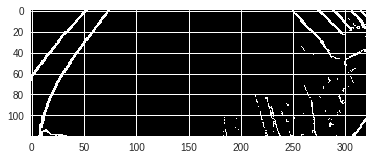

In [0]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(X_valid))
x=57
img = X_valid[idx]
print (img.shape)
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
print (class_names[pred.argmax(-1)])


In [0]:
#model.save('model')
!sudo apt-get install libhdf5-serial-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libhdf5-serial-dev is already the newest version (1.10.0-patch1+docs-4).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libhdf5-serial-dev is already the newest version (1.10.0-patch1+docs-4).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [0]:
import h5py

In [0]:
tf.keras.models.save_model(
    model,
    'model.hdf5',
    overwrite=True,
    include_optimizer=True
)

In [0]:
tf.keras.models.load_model(
    'model.hdf5',
    custom_objects=None,
    compile=True
)

In [0]:
model.save('model030419.model')